In [1]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

from pipeline_grid_removal import straighten_page, remove_grid_lines


Load image

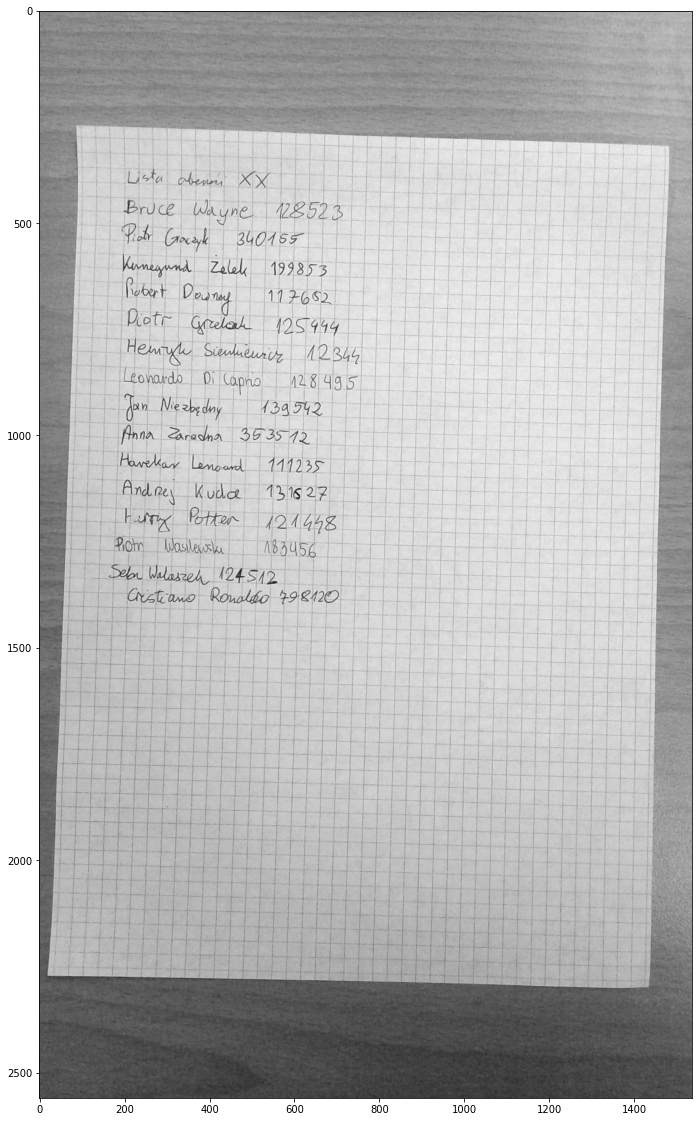

In [3]:
image = cv.imread('../data/2.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.imshow(image, cmap='gray')
plt.show()

Straighten image

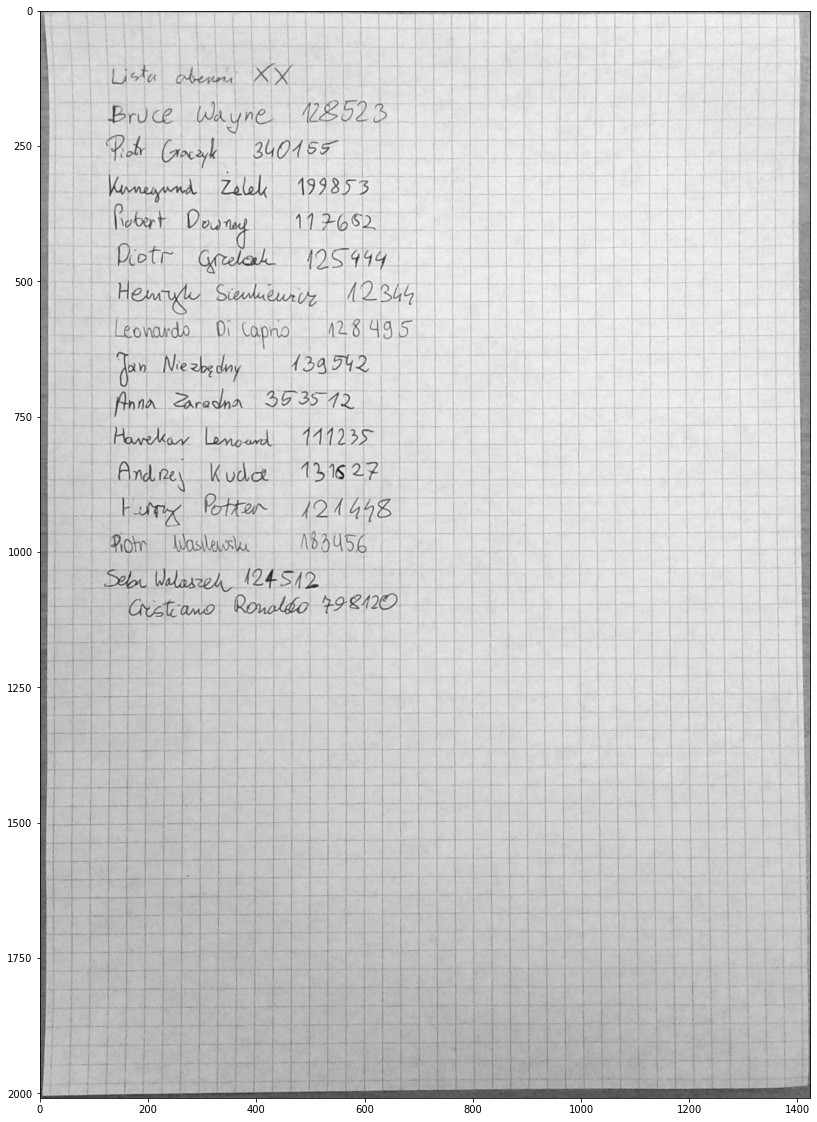

In [4]:
image_straightened, moments = straighten_page(image)


plt.figure(figsize=(20, 20))
plt.imshow(image_straightened, cmap='gray')
plt.show()


Reverse straightening

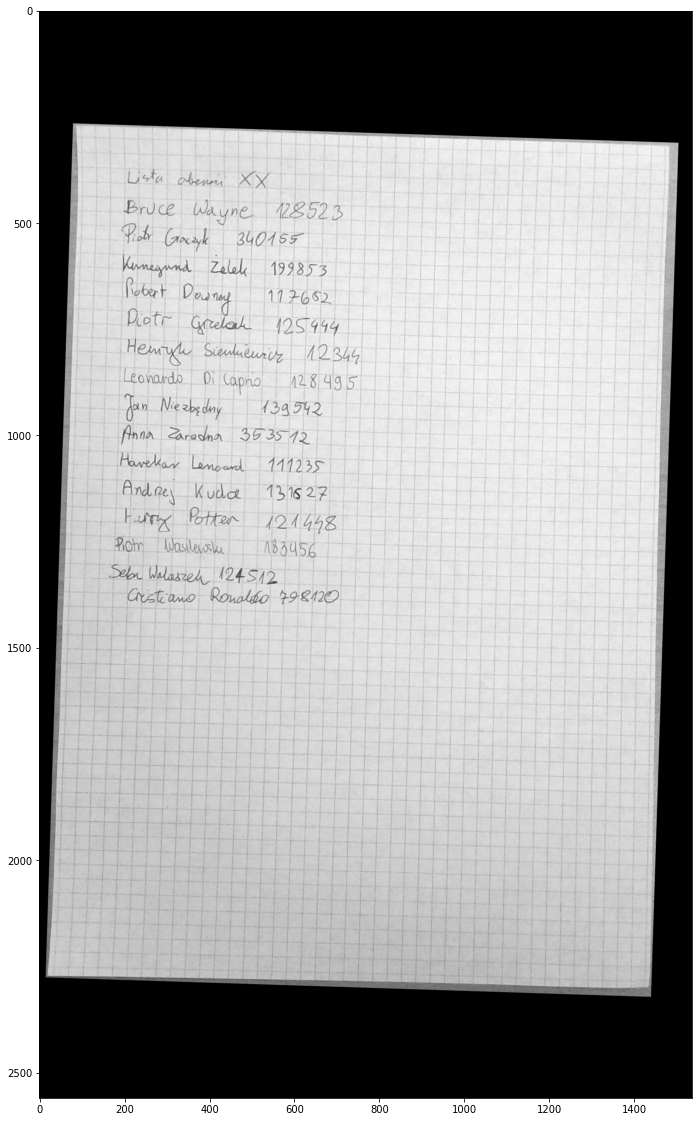

In [5]:
import numpy as np

inv_moments = np.linalg.pinv(moments)
image_reverse_straightened = cv.warpPerspective(image_straightened, inv_moments, (image.shape[1], image.shape[0]))

plt.figure(figsize=(20, 20))
plt.imshow(image_reverse_straightened, cmap='gray')
plt.show()

Remove grid lines

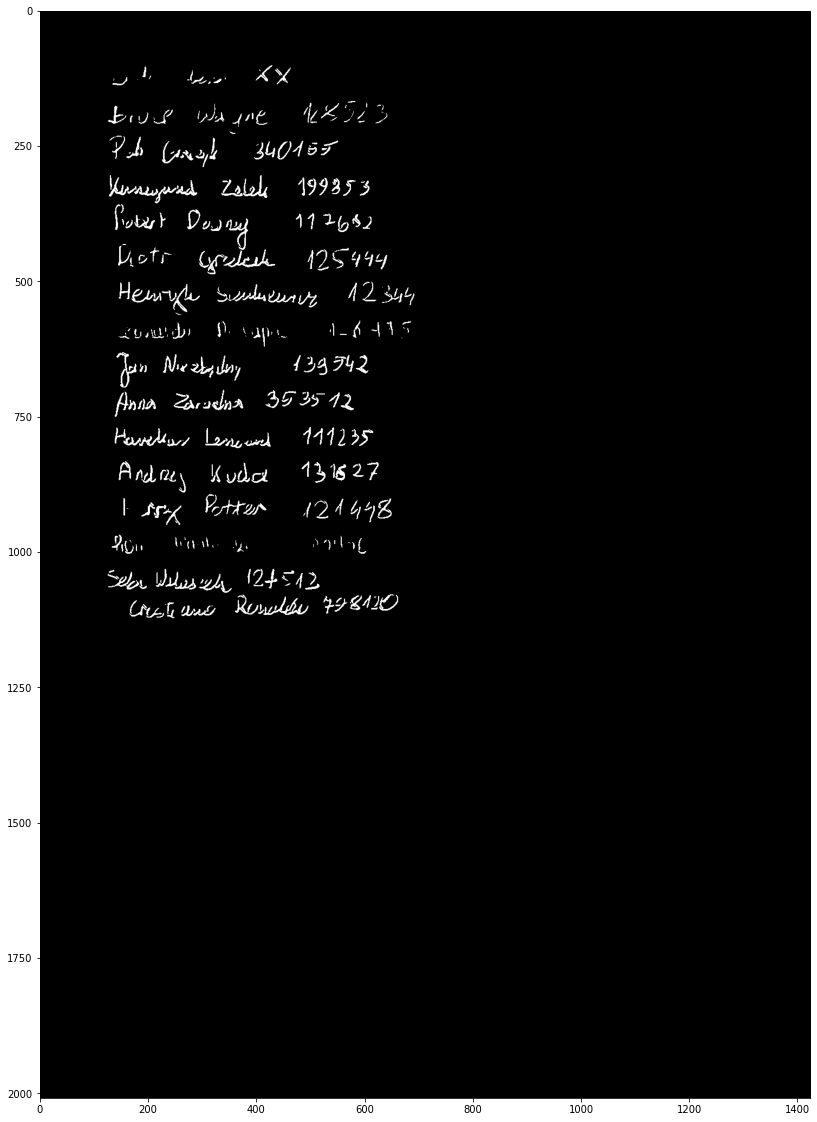

In [6]:
image_no_grid = remove_grid_lines(image_straightened)

plt.figure(figsize=(20, 20))
plt.imshow(image_no_grid, cmap='gray')
plt.show()

Test on all images

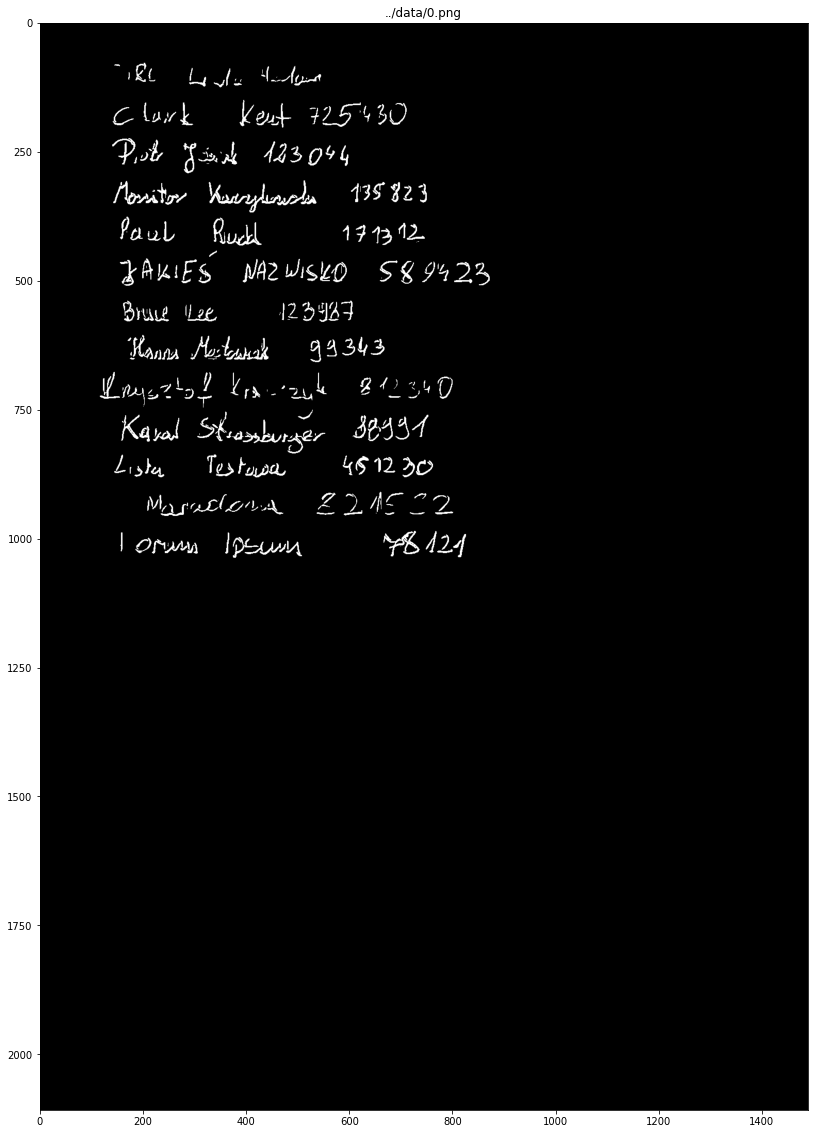

Took : 10.725s


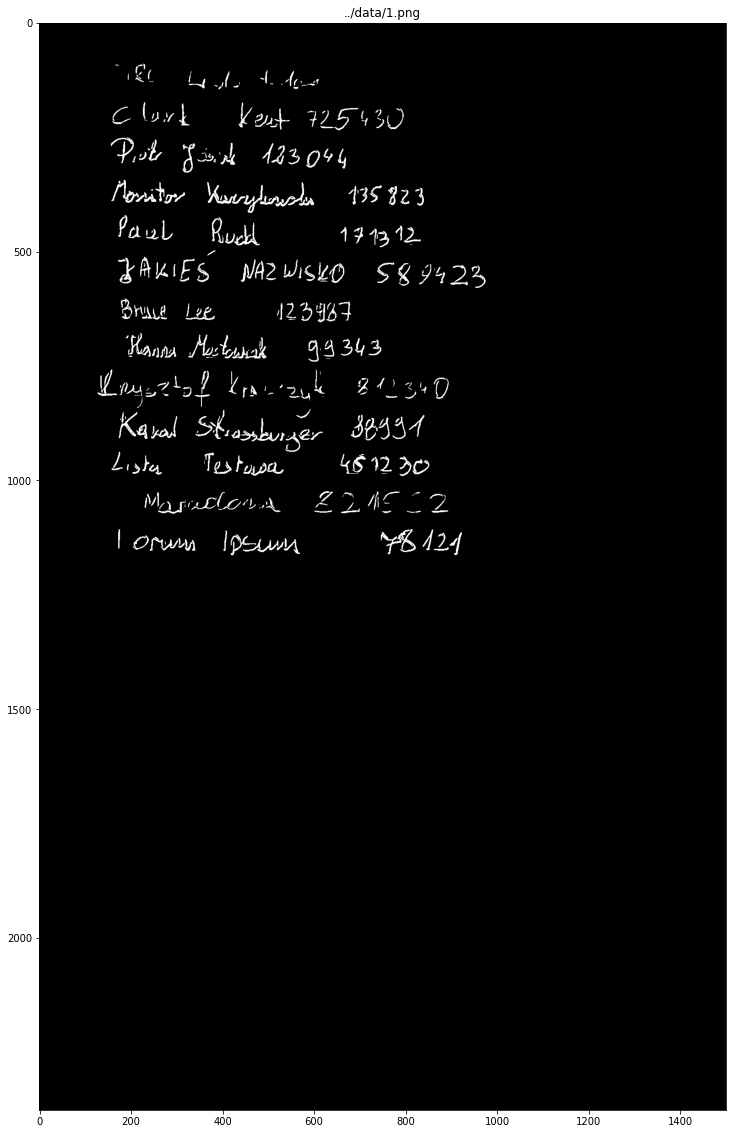

Took : 14.845s


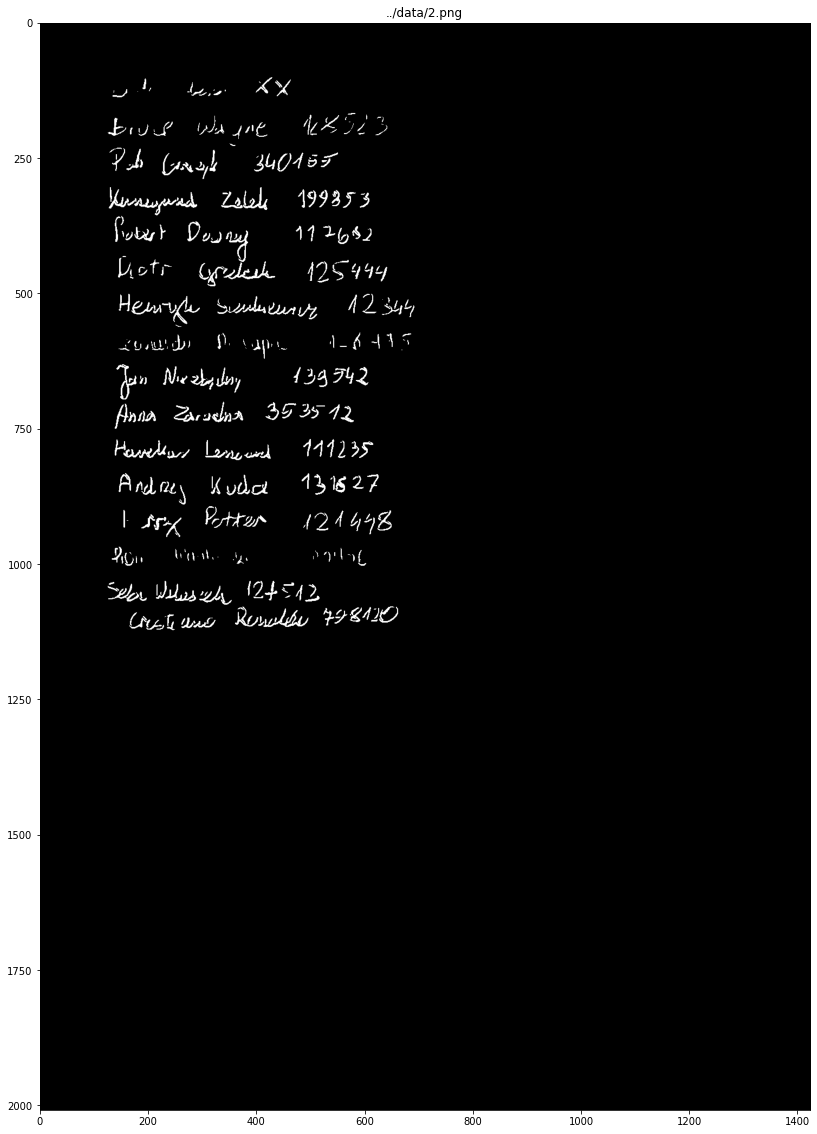

Took : 10.376s


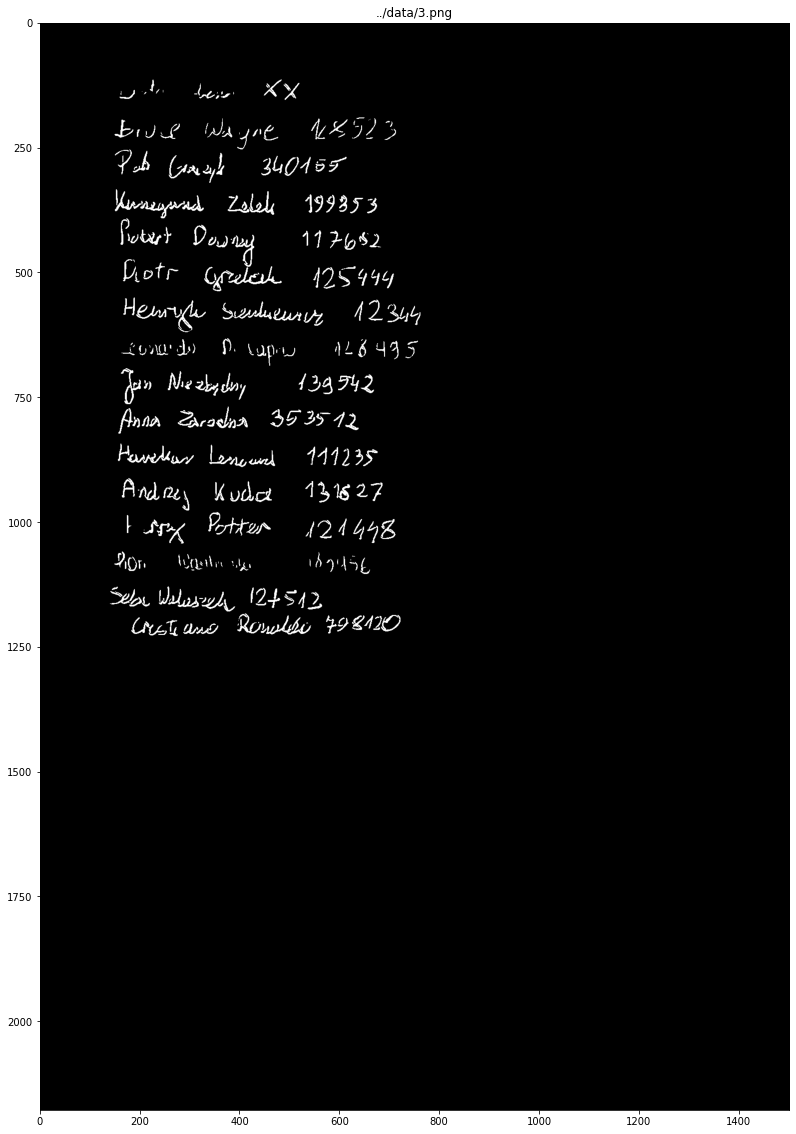

Took : 10.973s


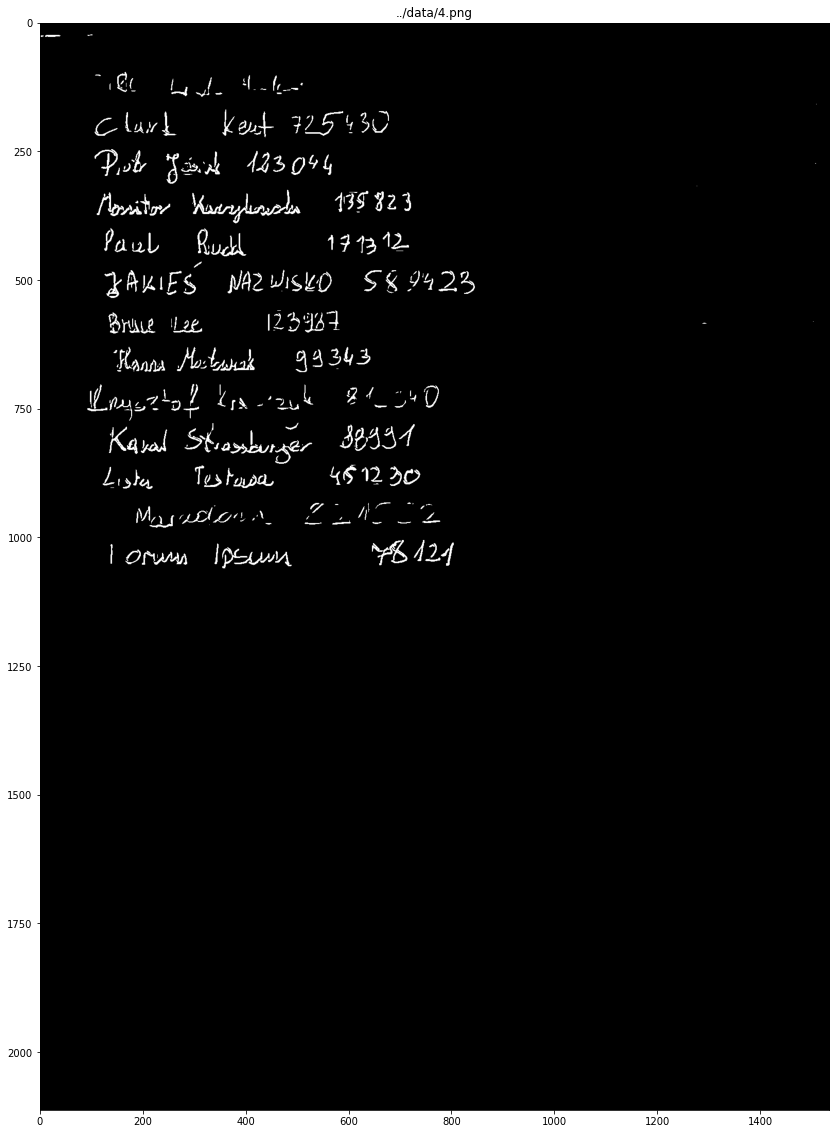

Took : 9.183s


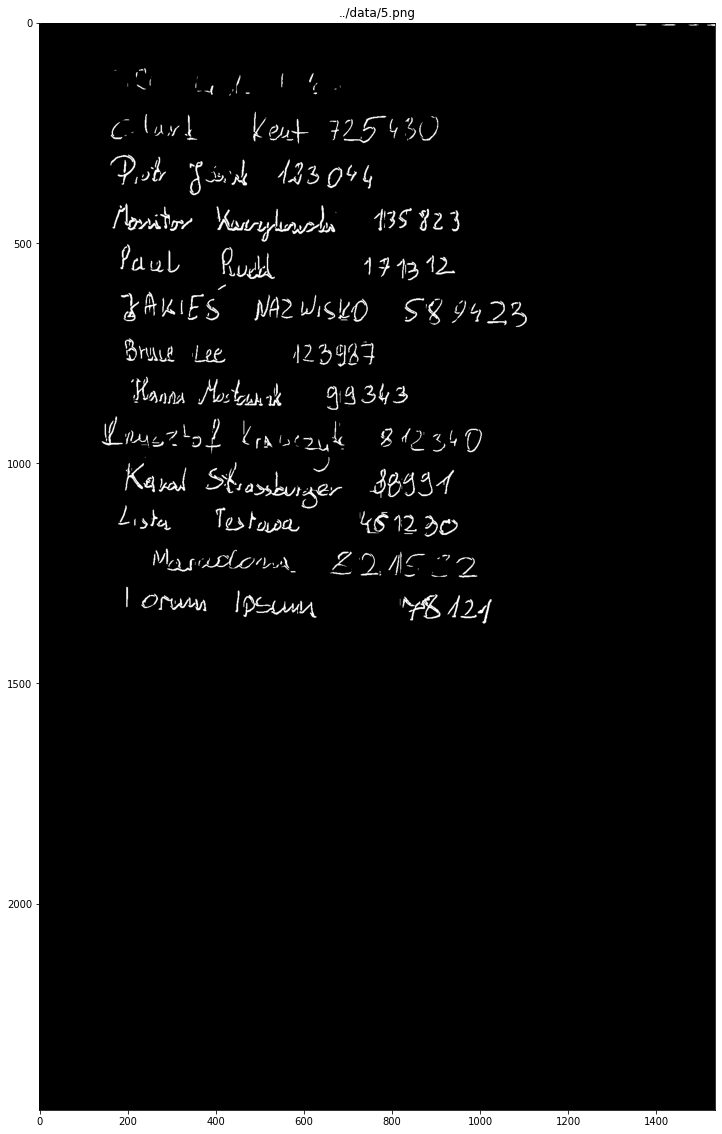

Took : 15.032s


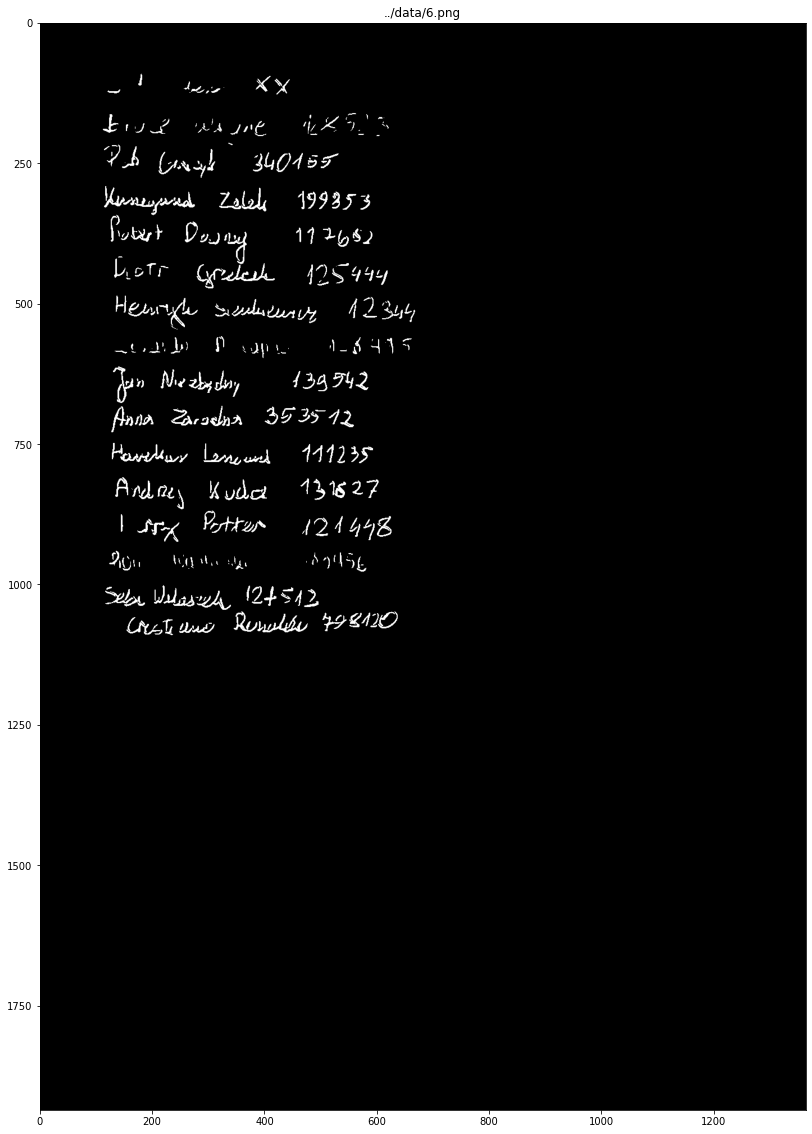

Took : 7.674s


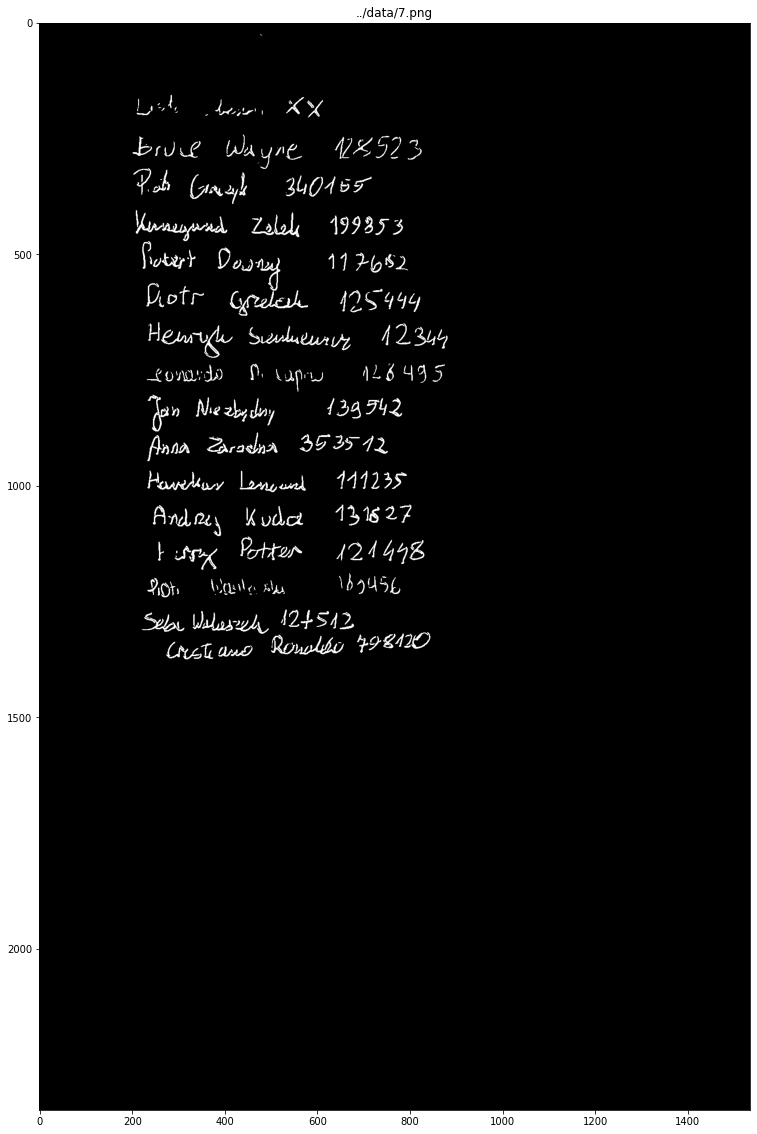

Took : 9.311s


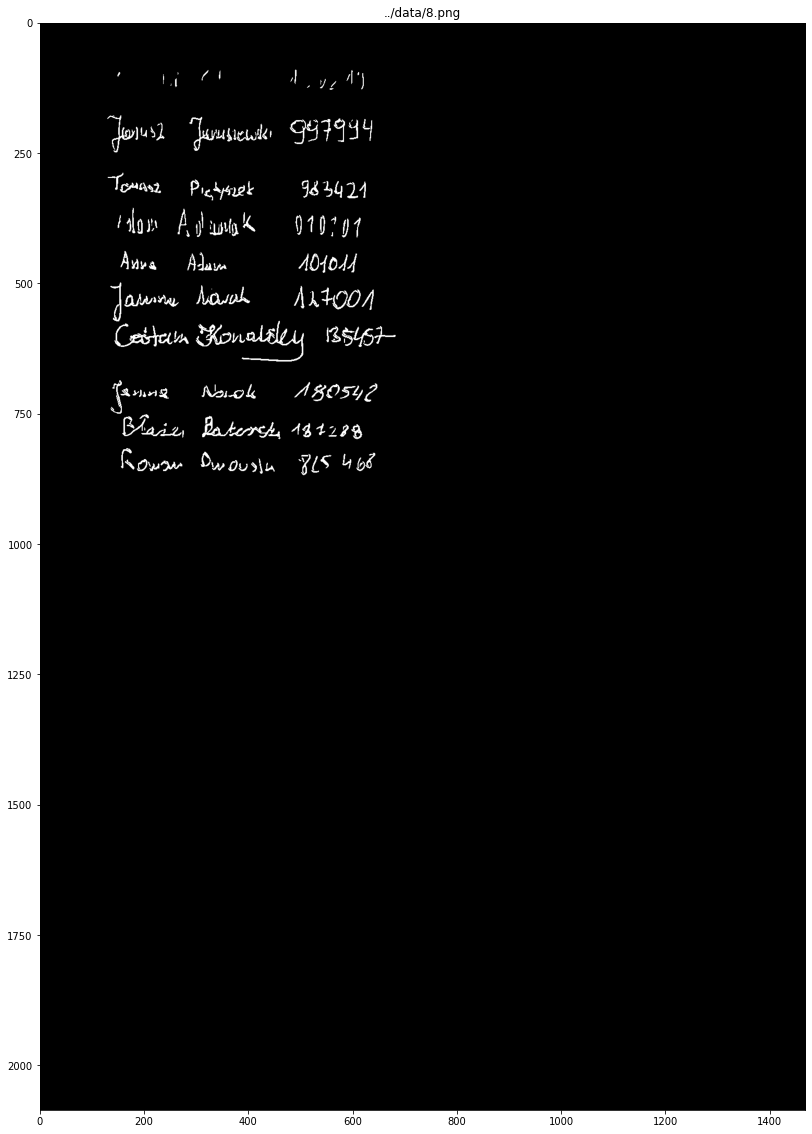

Took : 6.354s


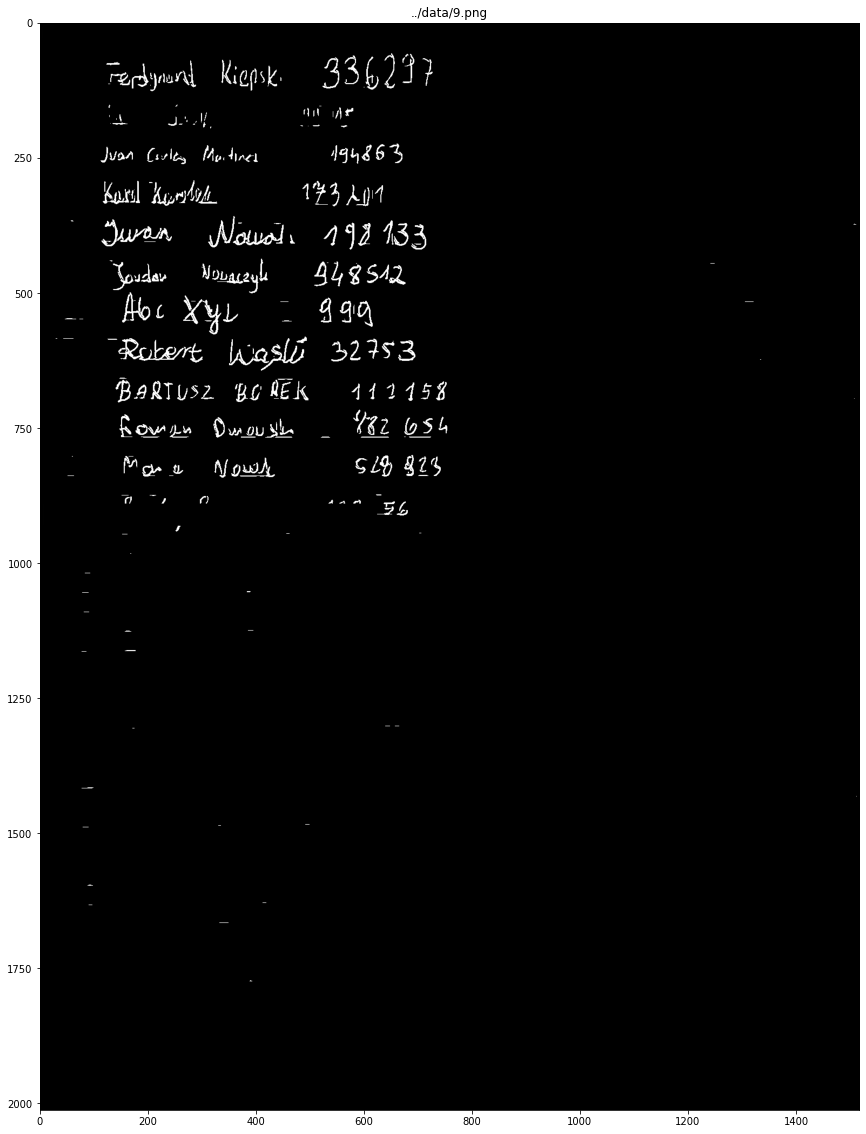

Took : 8.505s


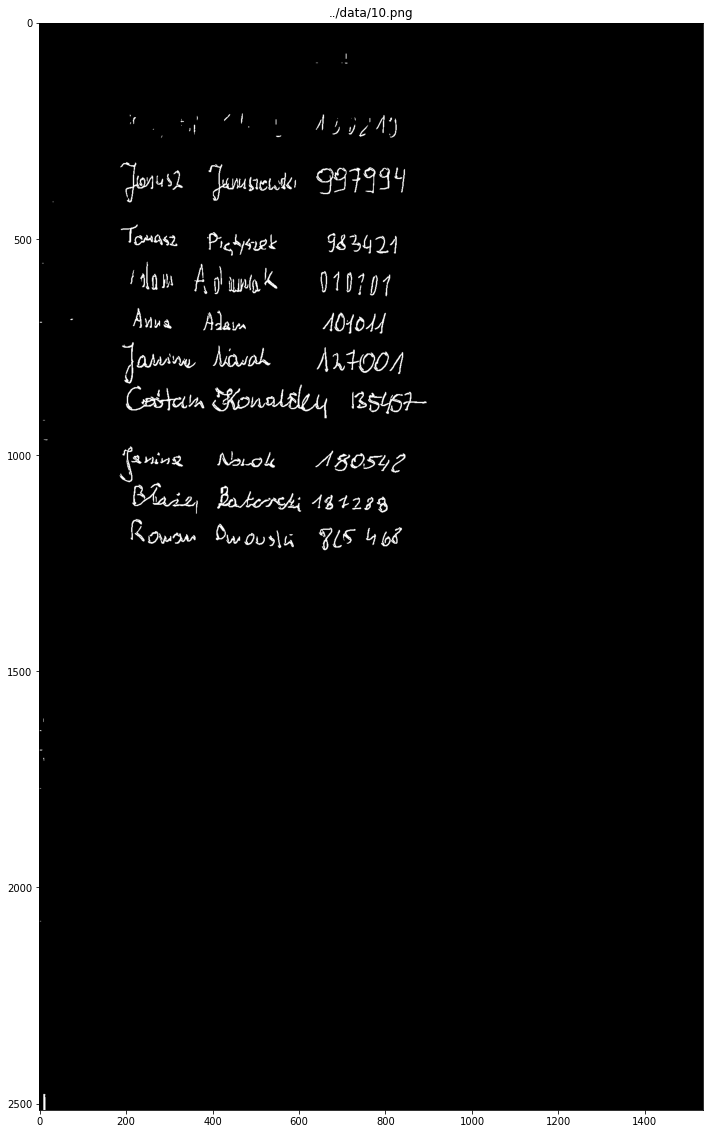

Took : 6.958s


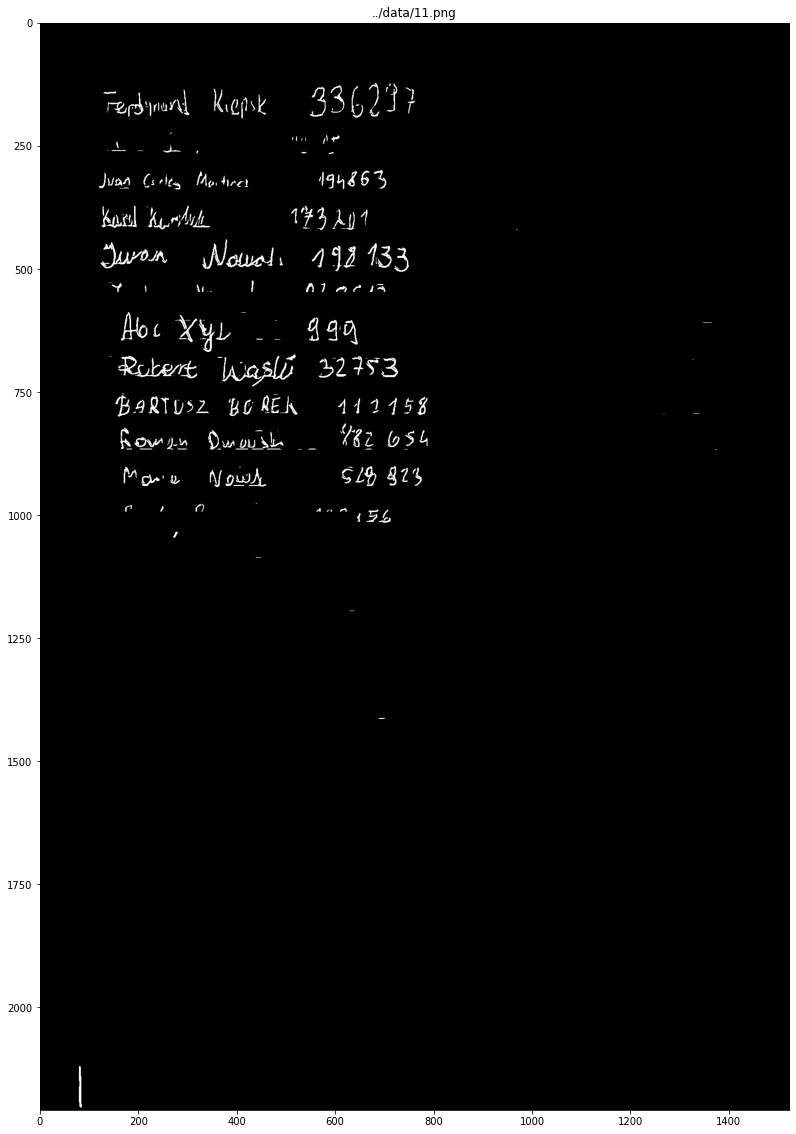

Took : 9.124s


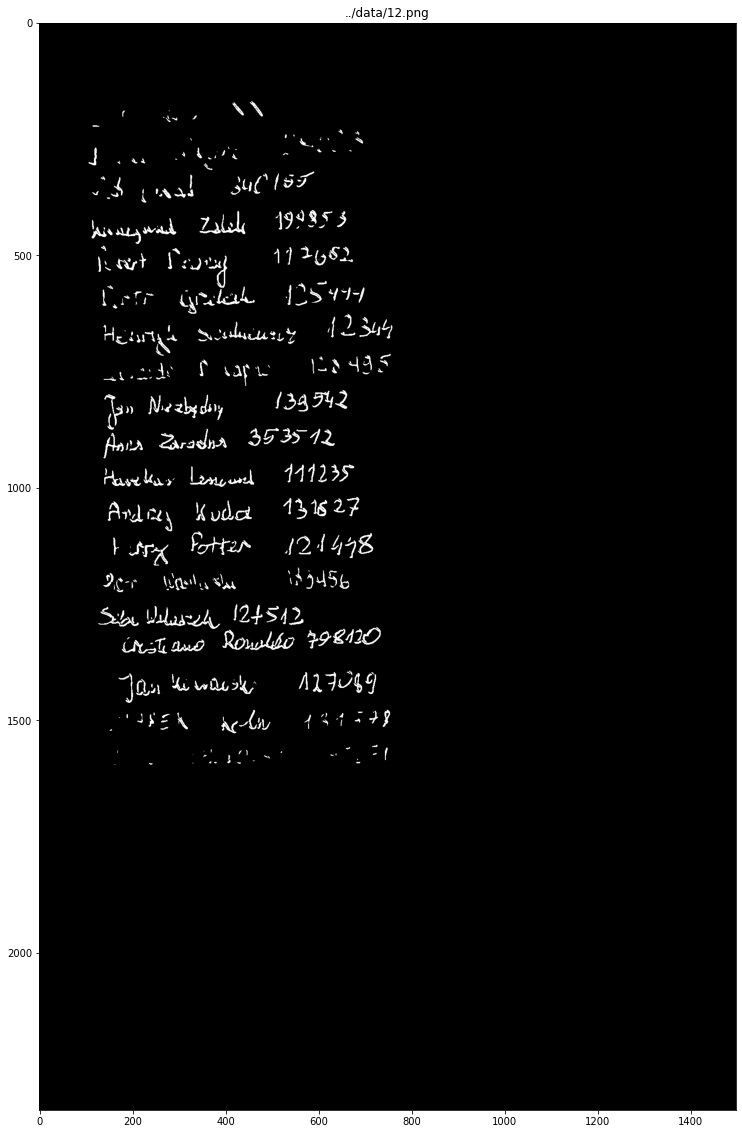

Took : 6.739s


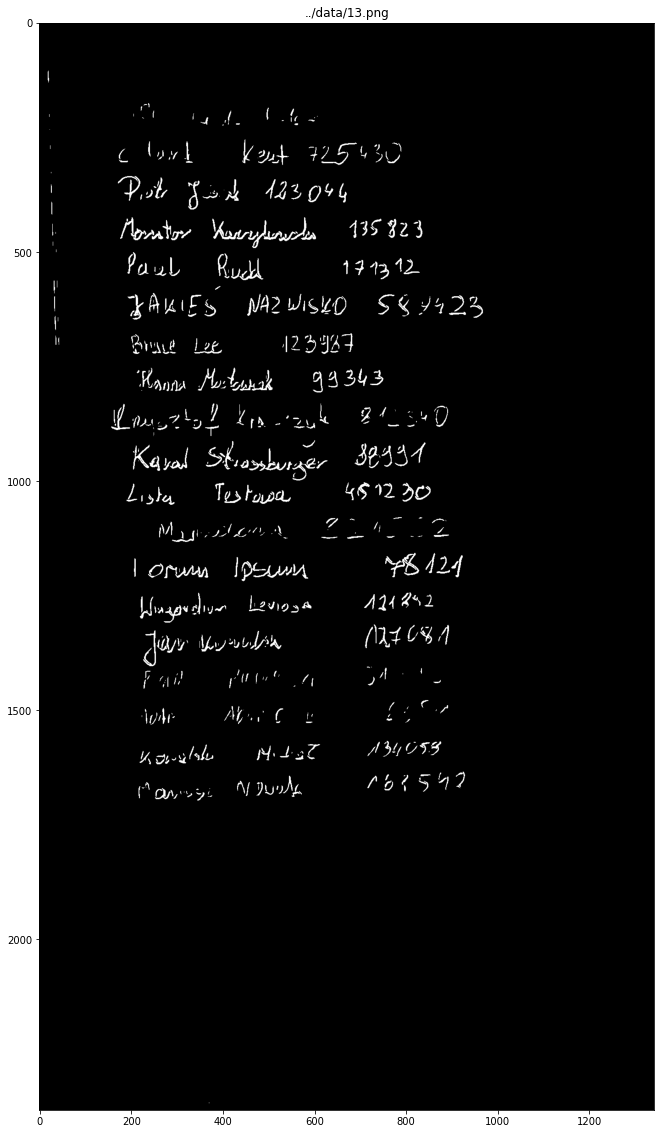

Took : 13.509s


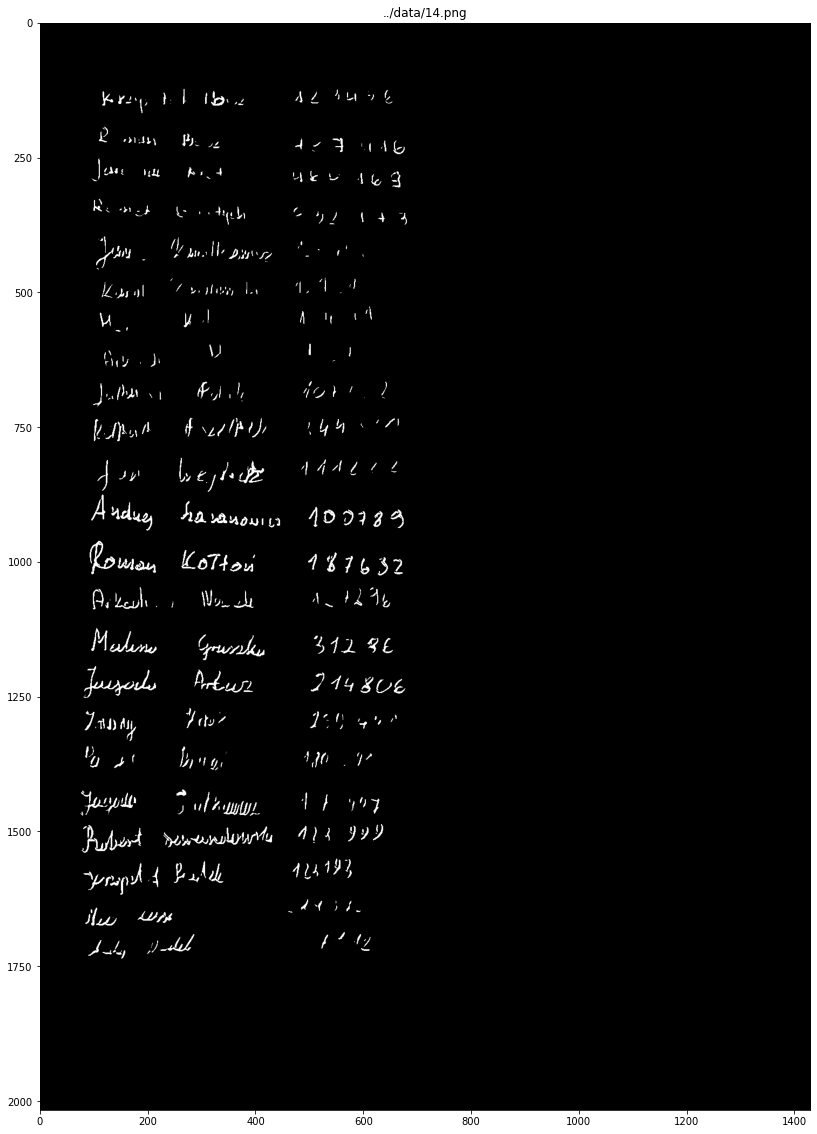

Took : 11.816s


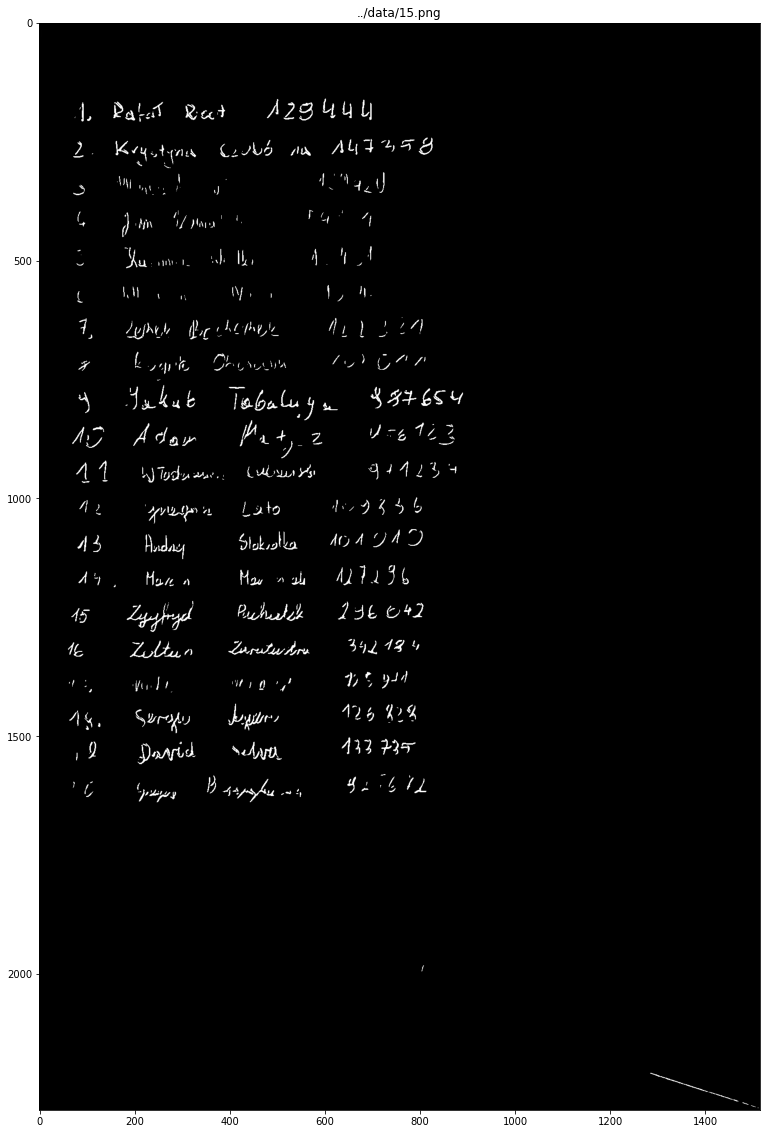

Took : 11.958s


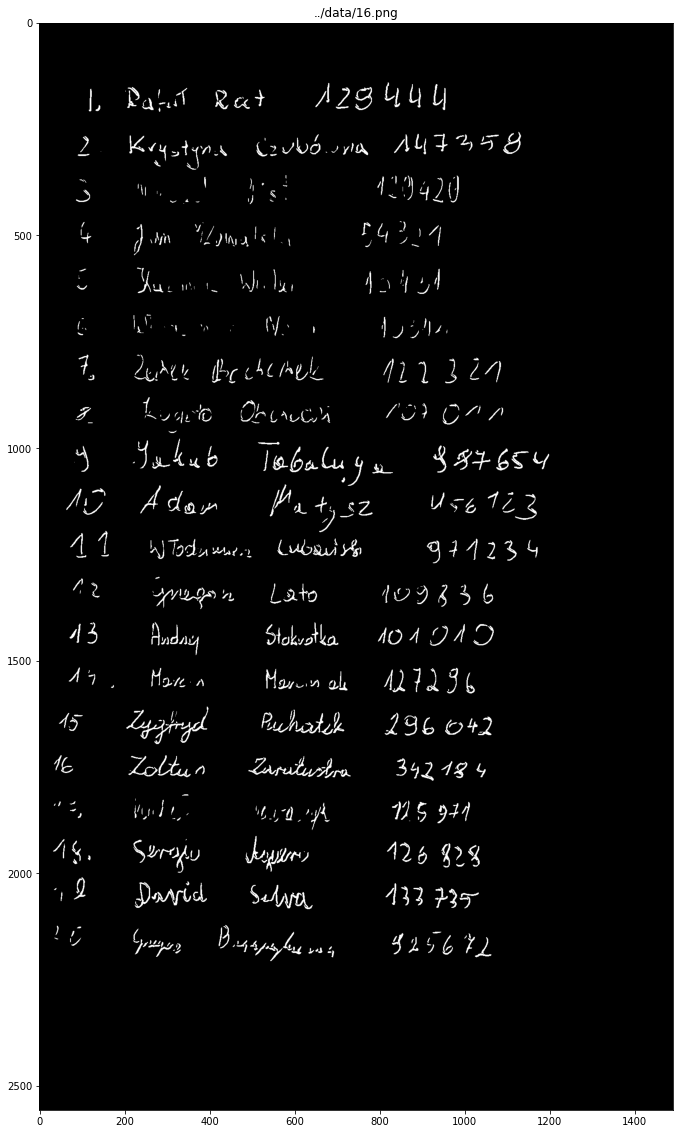

Took : 15.413s


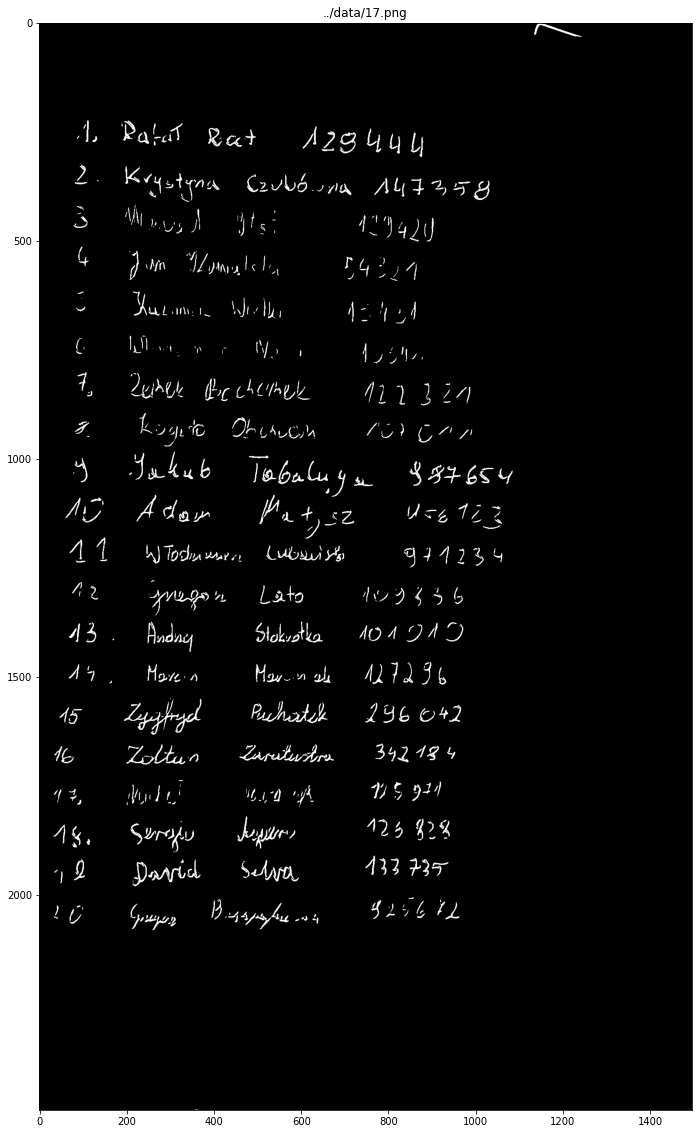

Took : 14.827s


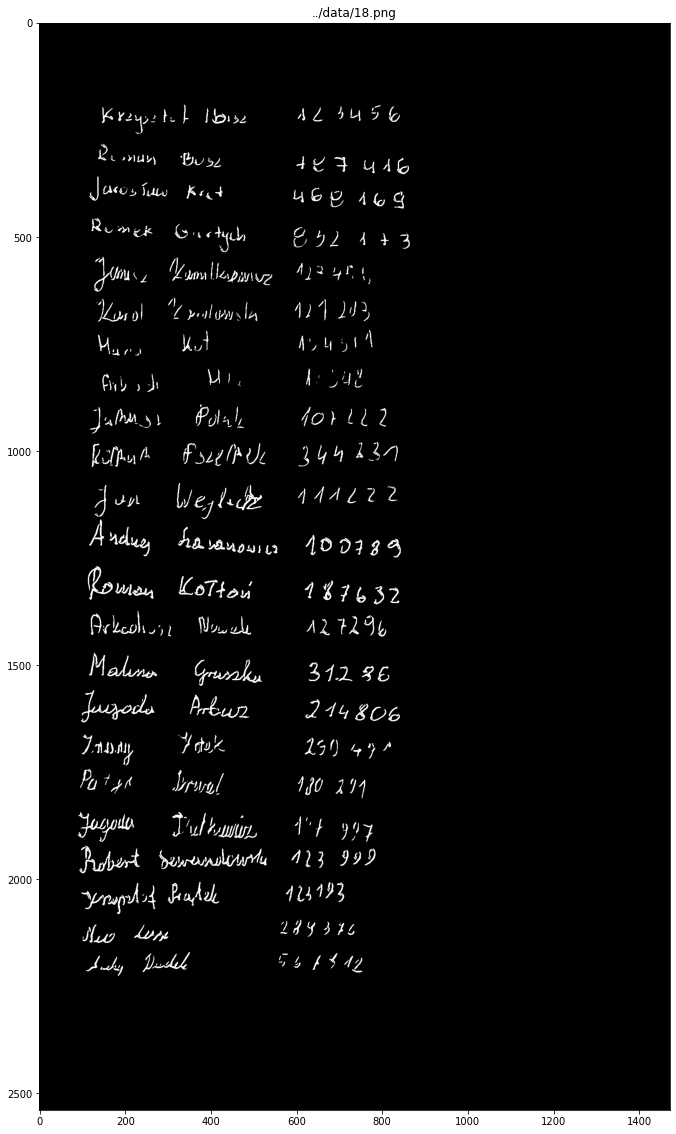

Took : 15.403s


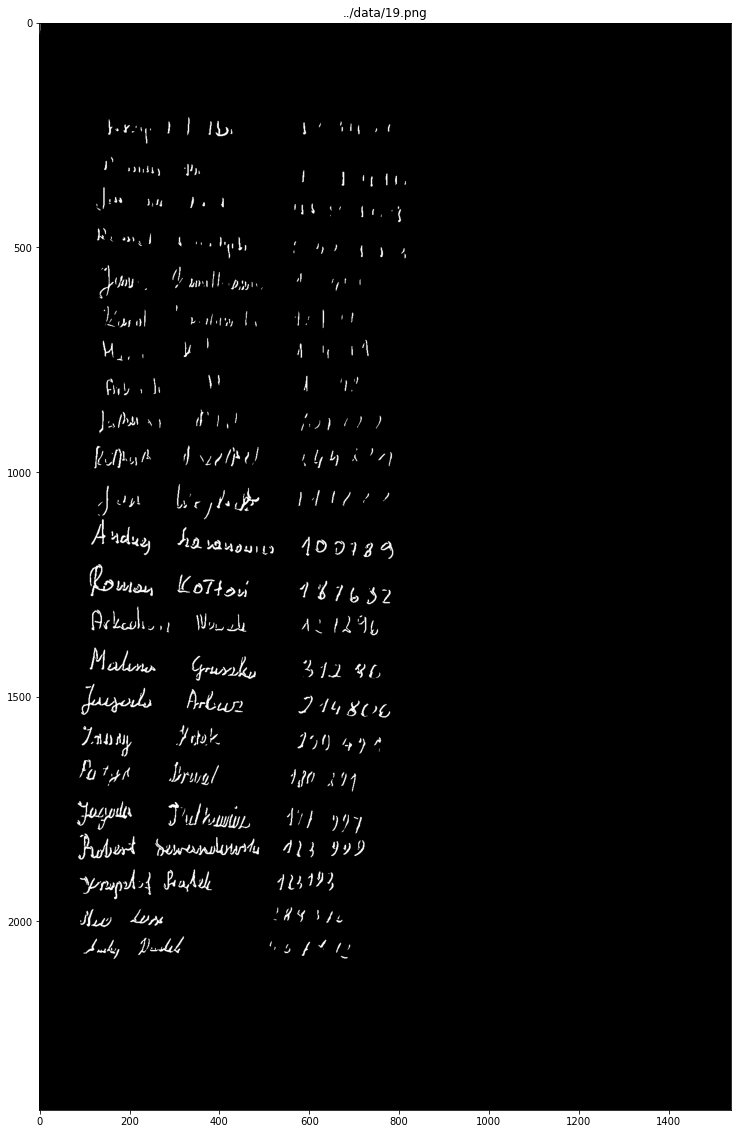

Took : 9.696s


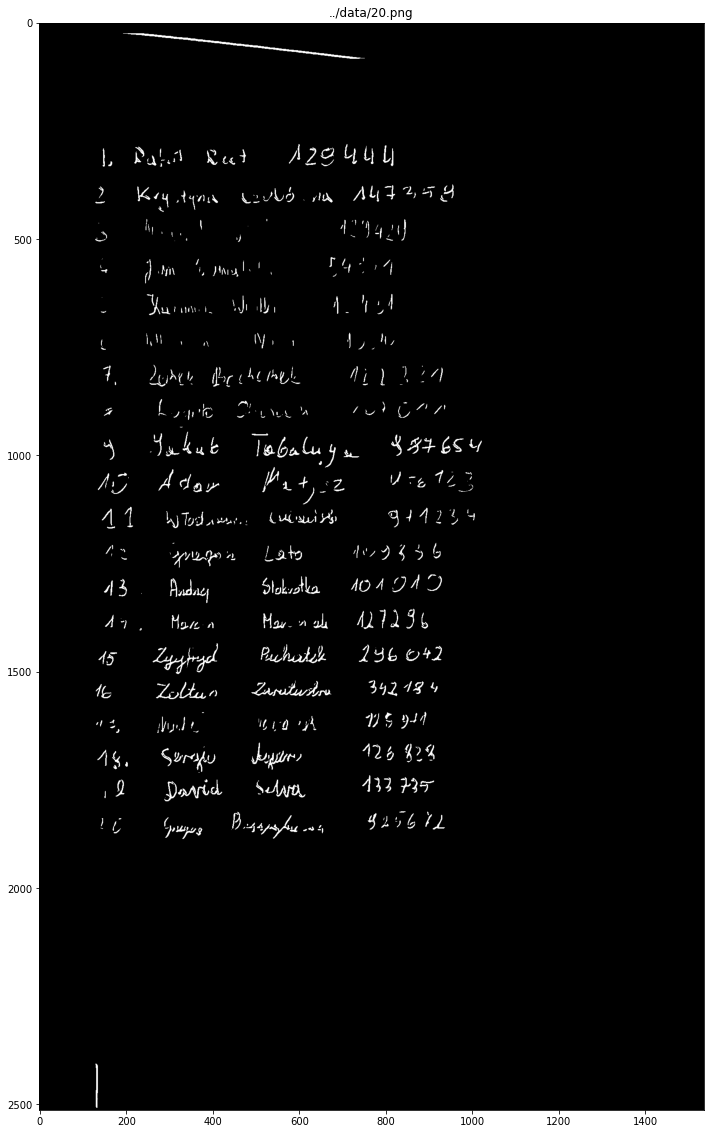

Took : 9.929s


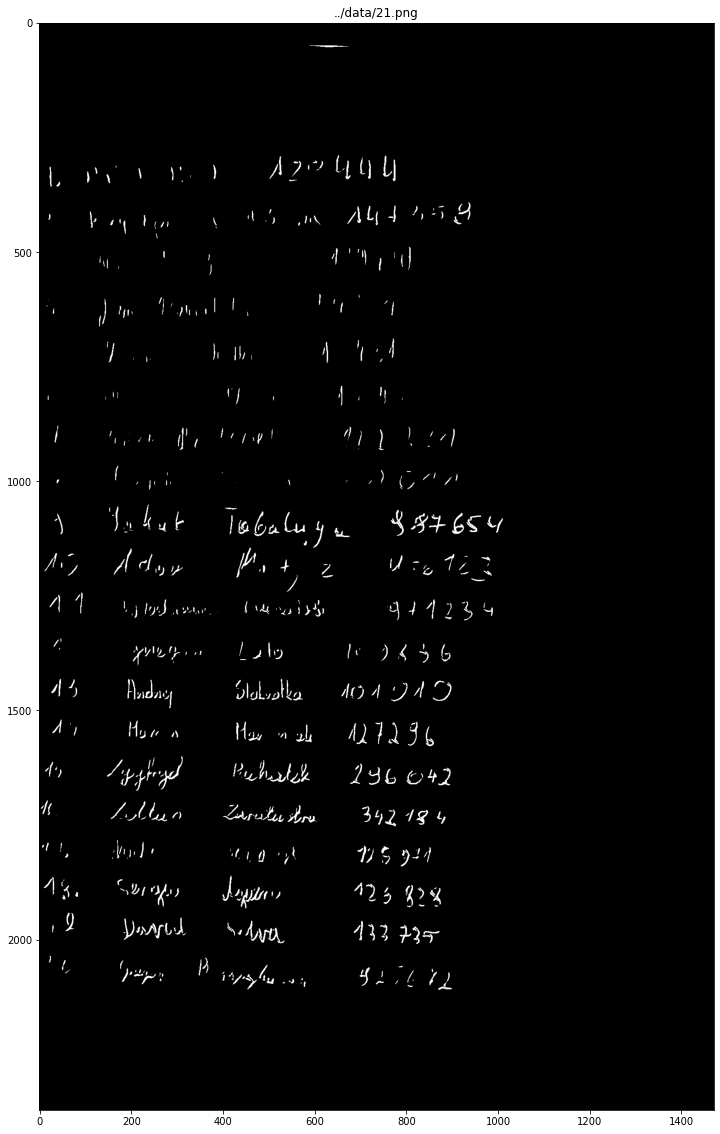

Took : 11.843s


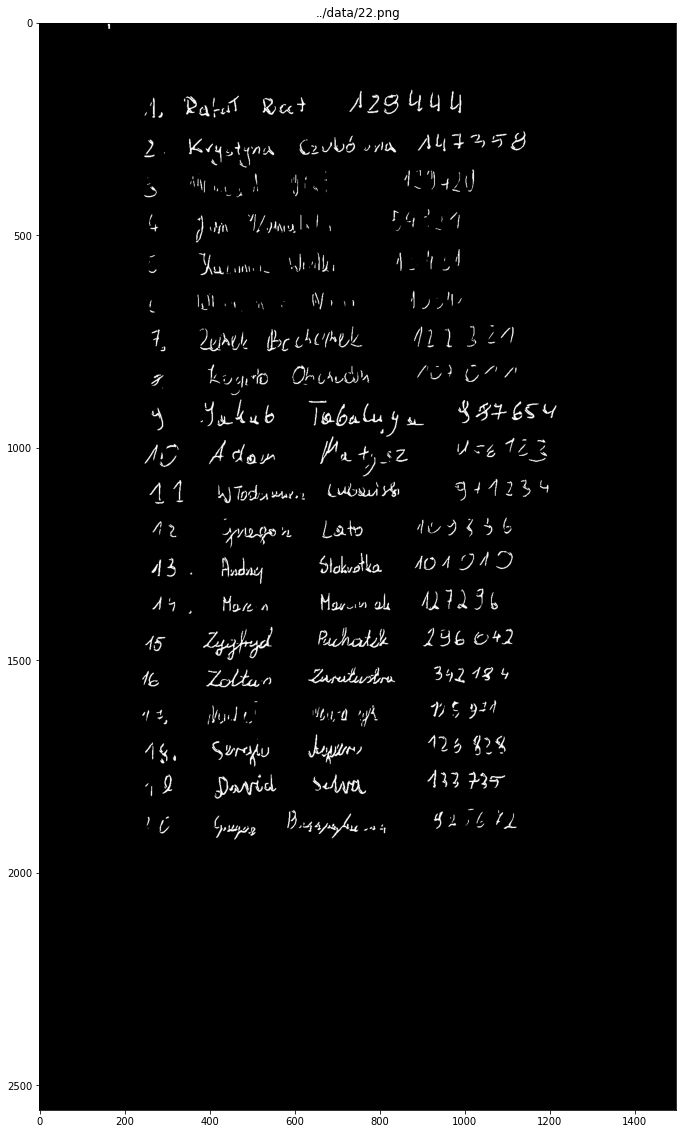

Took : 15.305s


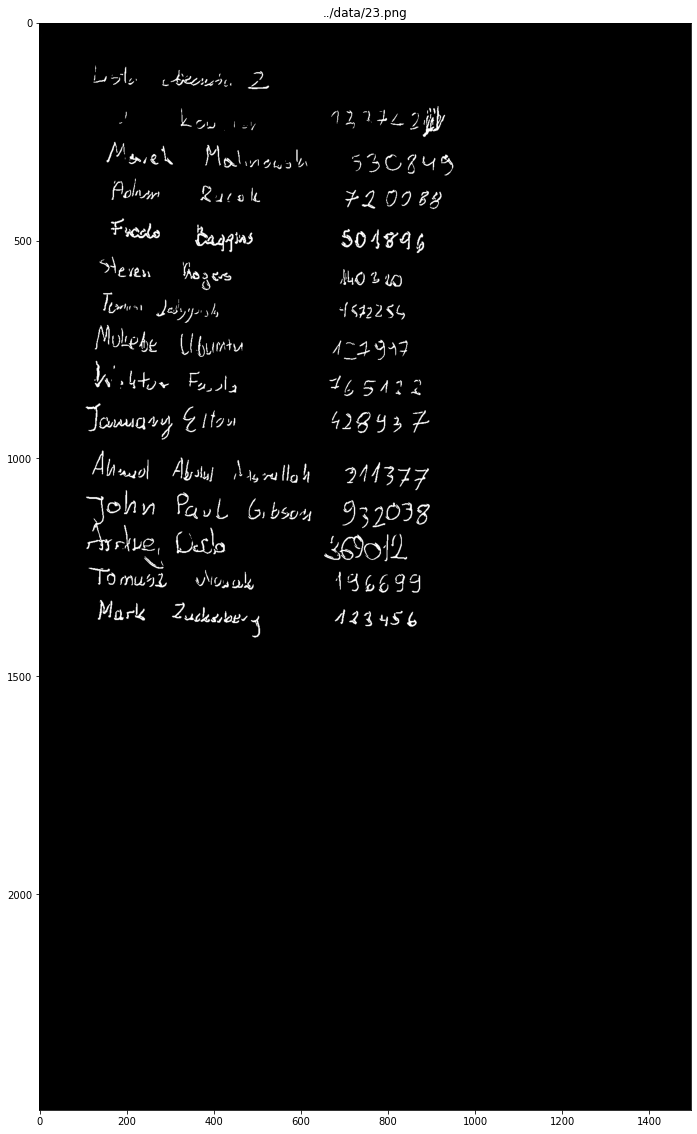

Took : 12.222s


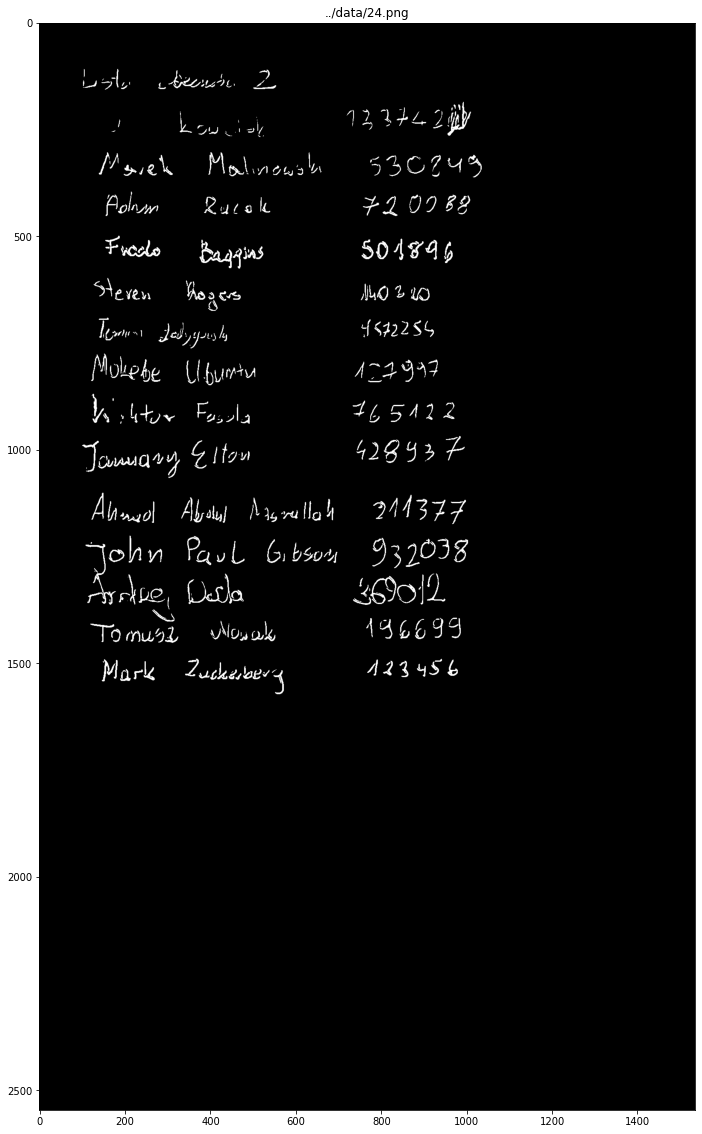

Took : 16.482s


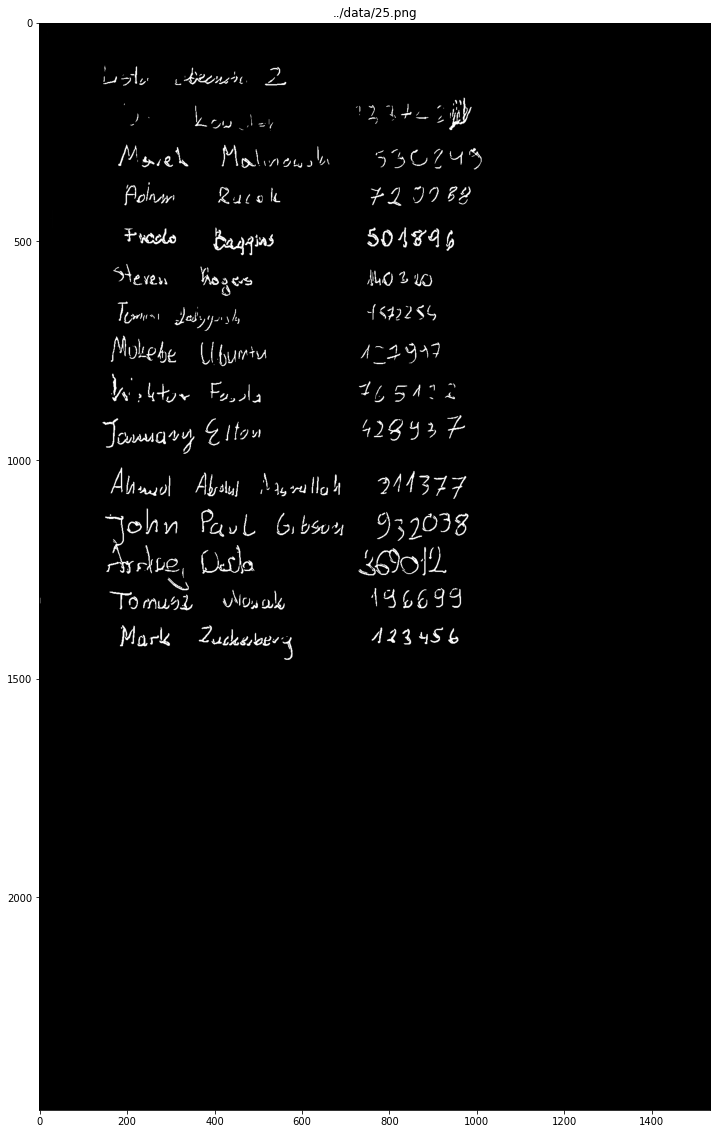

Took : 13.358s


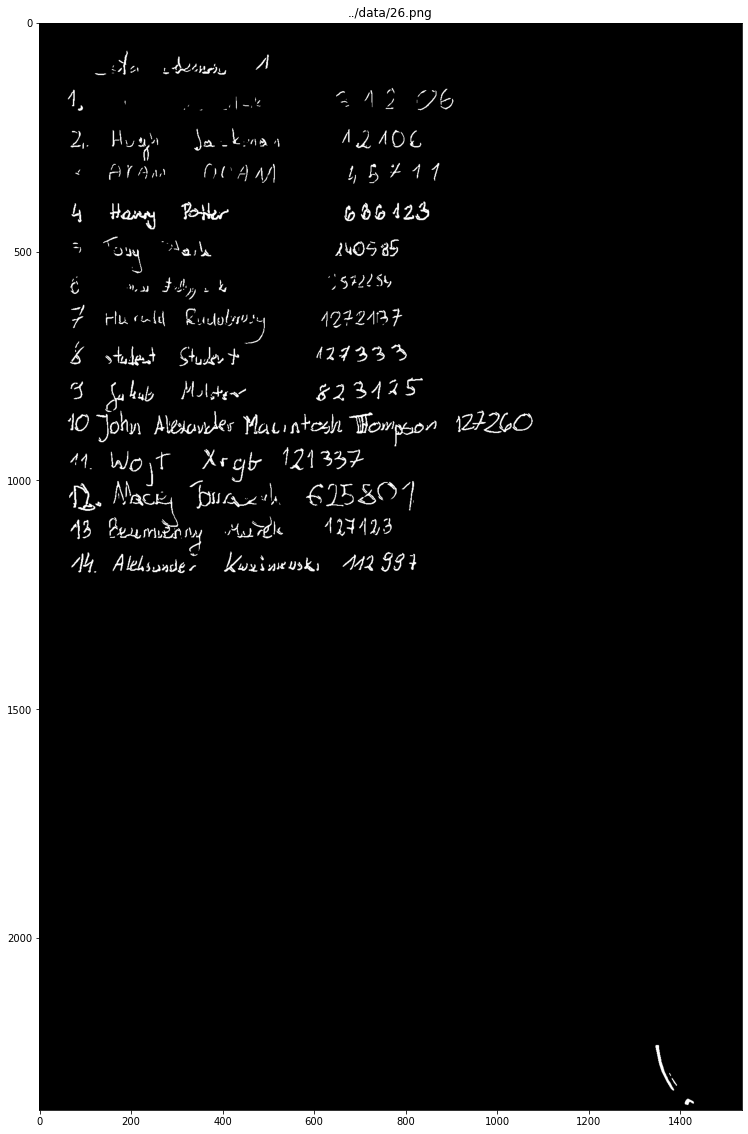

Took : 15.7s


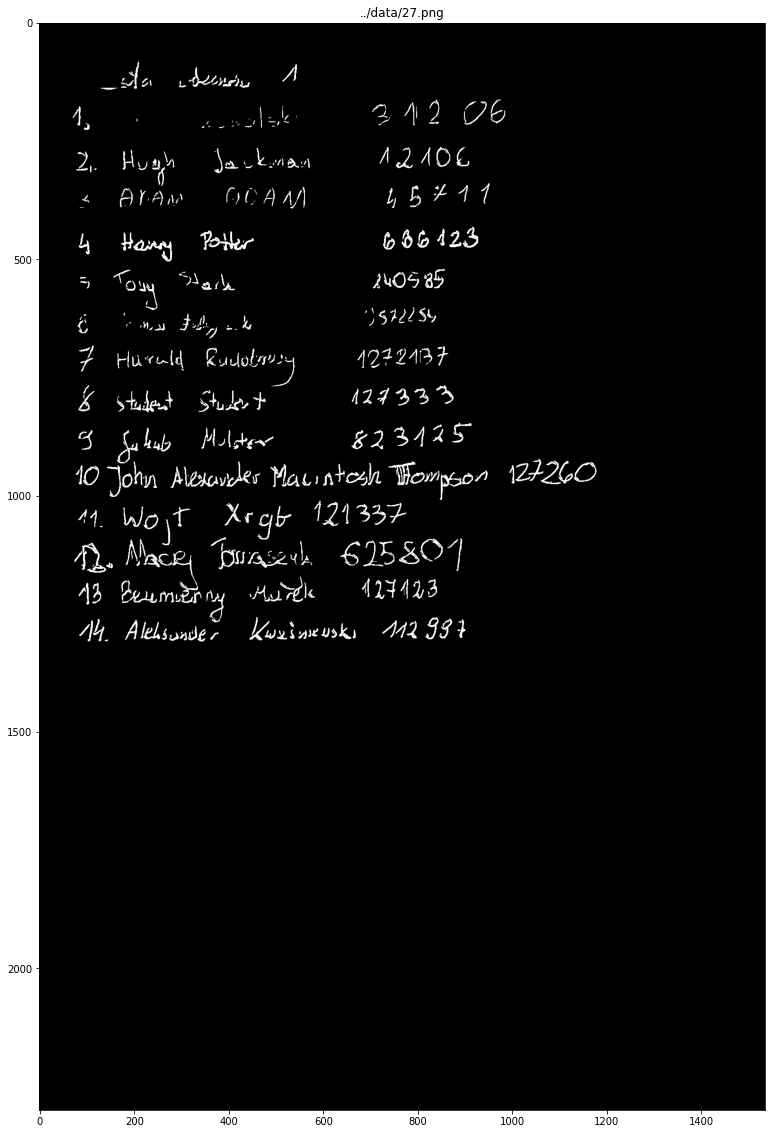

Took : 15.294s


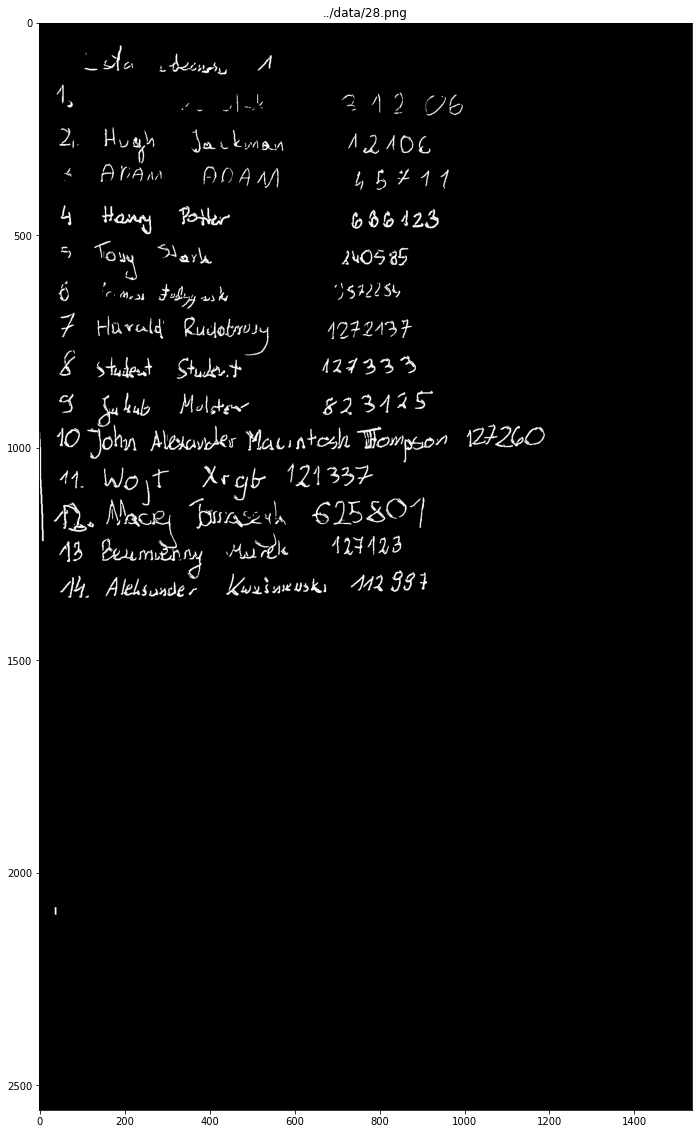

Took : 16.529s


In [7]:
from time import time

for i in range(0, 29):
    time_start = time()
    file_path = f'../data/{i}.png'
    image = cv.imread(file_path, cv.IMREAD_GRAYSCALE)
    image_straightened, _ = straighten_page(image)
    image_no_grid = remove_grid_lines(image_straightened)

    plt.figure(figsize=(20, 20))
    plt.title(file_path)
    plt.imshow(image_no_grid, cmap='gray')
    plt.show()
    duration = time() - time_start
    duration = round(duration, 3)
    print(f'Took : {duration}s')